In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("school.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.columns= ["gen","race","par_edu","lunch","prep course","math","reading","writing"]

In [4]:
df.head()

,gen,race,par_edu,lunch,prep course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.gen[df.gen=="male"]=1
df.gen[df.gen=="female"]=0

<ipython-input-5-3a1e24a51d0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gen[df.gen=="male"]=1
<ipython-input-5-3a1e24a51d0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gen[df.gen=="female"]=0


In [6]:
df.head()

,gen,race,par_edu,lunch,prep course,math,reading,writing
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


In [7]:
math = np.array(df["math"])
reading = np.array(df["reading"])
writing = np.array(df["writing"])

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

[]

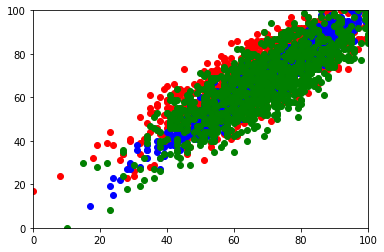

In [9]:
plt.axis([0,100,0,100])

plt.scatter(math,reading,color = "red")
plt.scatter(reading,writing,color = "blue")
plt.scatter(writing,math,color = "green")

plt.plot()

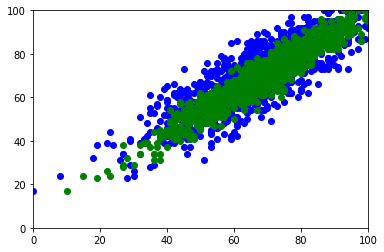

In [10]:
plt.axis([0,100,0,100])

plt.scatter(math,reading,color = "blue")
plt.scatter(writing,reading,color = "green")


In [11]:
x = np.array(df[["reading","writing"]])
y = np.array(df["math"])

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [14]:
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=reg.predict(x_test)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

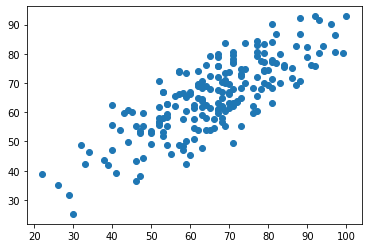

In [17]:
plt.scatter(y_test, y_pred)

94.54680909672709


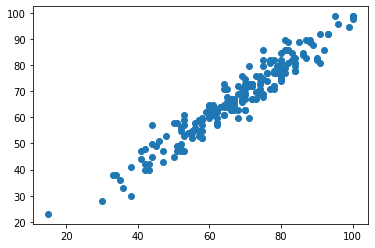

In [35]:
x = np.array(df[["reading"]])
y = np.array(df["writing"])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
for i in range(0,len(y_test)):
    s+=((abs(y_test[i]-y_pred[i])/y_test[i])*100)
s=s/len(y_test)
print(100-s)

87.21511541613523


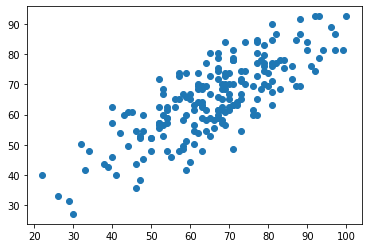

In [34]:
x = np.array(df[["reading"]])
y = np.array(df["math"])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
for i in range(0,len(y_test)):
    s+=((abs(y_test[i]-y_pred[i])/y_test[i])*100)
s=s/len(y_test)
print(100-s)

94.86372214622334


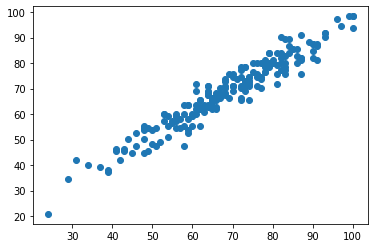

In [55]:
x = np.array(df[["writing"]])
y = np.array(df["reading"])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
s=0
for i in range(0,len(y_test)):
    s+=((abs(y_test[i]-y_pred[i])/y_test[i])*100)
s=s/len(y_test)
print(100-s)

In [56]:
reg.predict([[82]])

array([81.93946121])

In [57]:
df[(df["writing"]>=90) & (df["reading"]>=90) & (df["math"]>=90)]

,gen,race,par_edu,lunch,prep course,math,reading,writing
2,0,group B,master's degree,standard,none,90,95,93
114,0,group E,bachelor's degree,standard,completed,99,100,100
149,1,group E,associate's degree,free/reduced,completed,100,100,93
165,0,group C,bachelor's degree,standard,completed,96,100,100
179,0,group D,some high school,standard,completed,97,100,100
263,0,group E,high school,standard,none,99,93,90
451,0,group E,some college,standard,none,100,92,97
458,0,group E,bachelor's degree,standard,none,100,100,100
474,0,group B,associate's degree,standard,completed,90,90,91
546,0,group A,some high school,standard,completed,92,100,97


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
#plt.scatter(df["par_edu"],df["lunch"])
a = df[["par_edu","lunch"]]
b =a.value_counts()
b

par_edu             lunch       
some college        standard        147
associate's degree  standard        145
high school         standard        126
some high school    standard        118
some college        free/reduced     79
associate's degree  free/reduced     77
bachelor's degree   standard         74
high school         free/reduced     70
some high school    free/reduced     61
bachelor's degree   free/reduced     44
master's degree     standard         35
                    free/reduced     24
dtype: int64

<Figure size 720x576 with 0 Axes>

In [113]:
edu =["some college","associate's degree", "high school","some high school","bachelor's degree","master's degree"]
lnc = ["standard","free/reduced"]
z=[]
for e in edu:
    t=0
    for l in lnc:
        t+=b[e][l]
    p= (b[e]["standard"]/t)*100
    z.append([e,p])

z = np.array(z)


array([['some college', '65.04424778761062'],
       ["associate's degree", '65.31531531531532'],
       ['high school', '64.28571428571429'],
       ['some high school', '65.92178770949721'],
       ["bachelor's degree", '62.71186440677966'],
       ["master's degree", '59.32203389830508']], dtype='<U18')

No handles with labels found to put in legend.


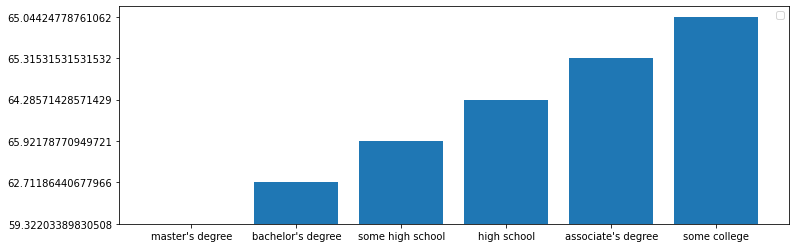

In [127]:
plt.figure(figsize=(12,4))
#Reverse the numpy array
z=z[::-1]

#Sort np array by column 1
z[z[:,1].argsort()]


#plotting bar chart
plt.bar(z[:,0],z[:,1])
plt.plot()